In [50]:
import pdb
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from helper import DataHelper
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h3> Pandas Data Frame 으로 파일 불러오기</h3>

이번 버젼부터는 3Secondz 기본 포맷인 STD_xxxxx.csv에 맞추어 동작합니다.
SCZ_sample.csv 와 컬럼명이 다를 수 있으니 주의해주세요.

In [11]:
datafile = 'std_001.csv'

df = pd.read_csv(datafile)

std 포맷의 파일의 경우 다음과 같이 초기화 할 수 있습니다.

In [64]:
dh = DataHelper(df)
print(vars(dh).keys())

dict_keys(['origin', 'df', 'localX', 'localY', 'distance', 'curvature', 'speed', 'heading', 'timestamp', 'interval'])


Preview 함수는 원본 dataframe과 같은 field를 리턴하며,
추가적으로 

<b>PreviewX, PreviewY, Curvature, Distance</b>

 리턴합니다

<h3> Time 기반 프리뷰 사용하는 경우

<IPython.core.display.Javascript object>


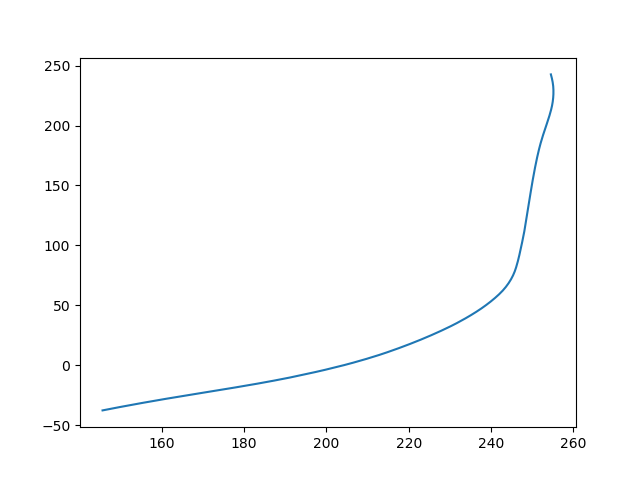

<IPython.core.display.Javascript object>


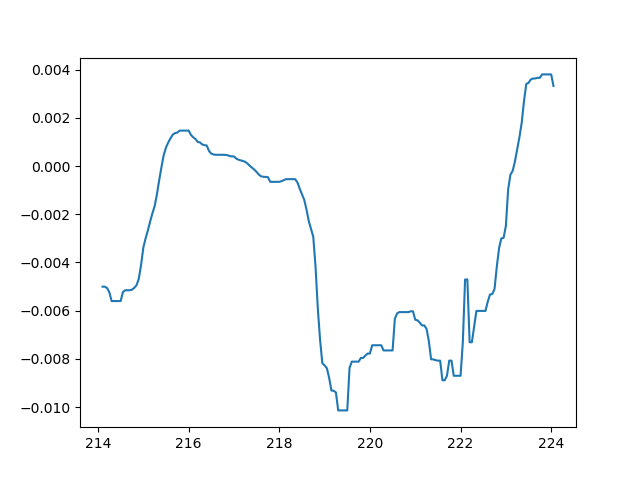

<IPython.core.display.Javascript object>


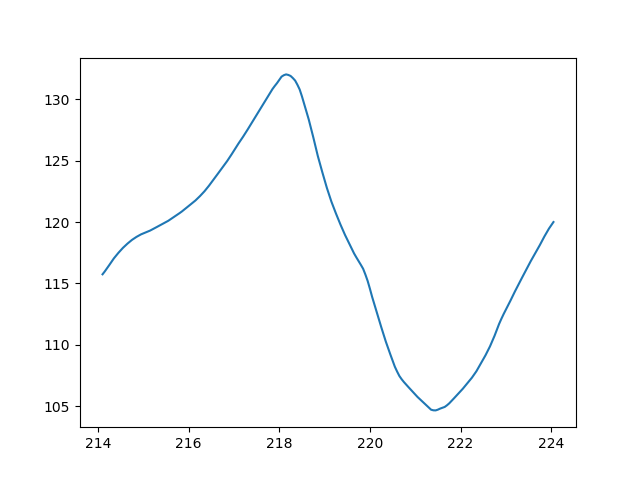

In [61]:
dh.set_preview_time(10.0) # 3초 preview
ind = 1000 # Preview 시작할 index
res = dh.get_preview(ind, 'TIME')

plt.figure()
plt.plot(res['PosLocalX'], res['PosLocalY'])
plt.figure()
plt.plot(res['TimeStamp'],res['Curvature'])
plt.figure()
plt.plot(res['TimeStamp'],res['GPS_Speed'])

<h3>Distance Preview

<IPython.core.display.Javascript object>


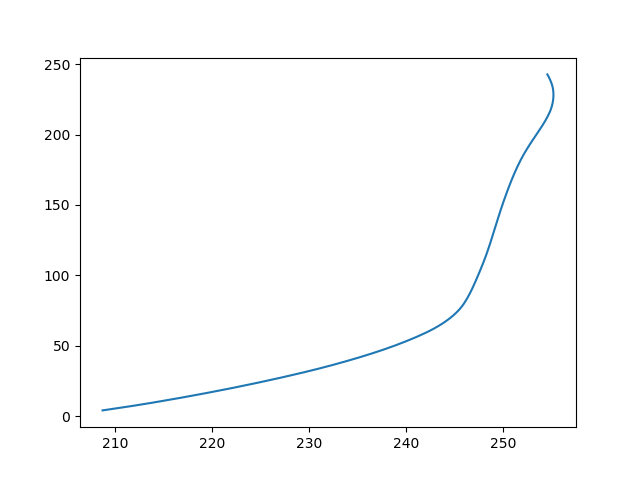

<IPython.core.display.Javascript object>


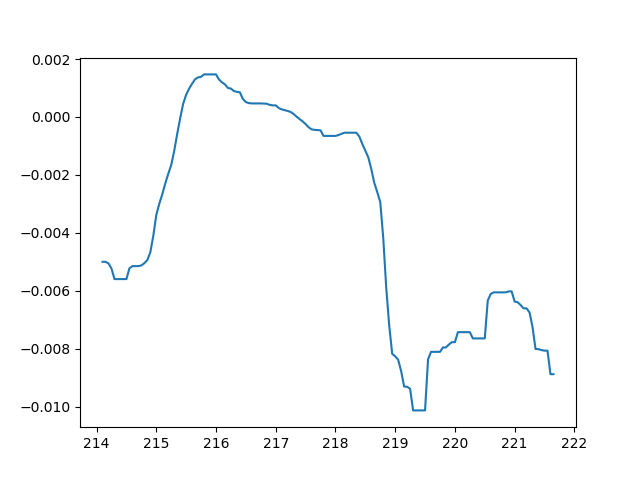

<IPython.core.display.Javascript object>


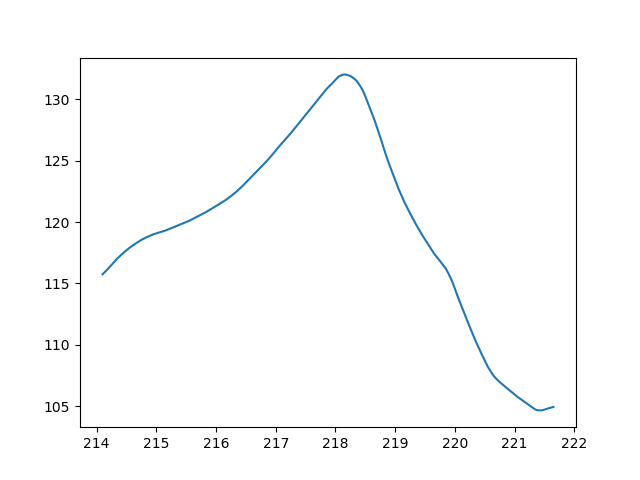

In [63]:
dh.set_preview_distance(250.0) # 250m preview
ind = 1000 # Preview 시작할 index
res = dh.get_preview(ind, 'DISTANCE')

plt.figure()
plt.plot(res['PosLocalX'], res['PosLocalY'])
plt.figure()
plt.plot(res['TimeStamp'],res['Curvature'])
plt.figure()
plt.plot(res['TimeStamp'],res['GPS_Speed'])